[array([ 3.09259263e+00,  2.95762889e+00,  2.97295499e+00,  2.86644144e+00,
        2.66611309e+00,  2.54183722e+00,  2.32552745e+00,  2.04914332e+00,
        1.95527592e+00,  1.71962561e+00,  1.52249466e+00,  1.32500502e+00,
        1.08911369e+00,  9.65335482e-01,  7.64863103e-01,  6.76417883e-01,
        5.06925458e-01,  4.38208903e-01,  3.33745584e-01,  3.29444364e-01,
        1.42321845e-01,  1.19663634e-01,  9.24608078e-02,  6.23558934e-02,
        9.11138601e-02,  5.73836562e-02,  2.51353908e-02, -7.39460407e-02,
        5.15068806e-02, -1.48767475e-02,  1.74296532e-02, -4.36233997e-02,
       -1.20904762e-01, -3.37169537e-02, -2.86019242e-02, -2.72932442e-03,
       -7.53874875e-03, -3.75861458e-02,  1.17269986e-02,  7.36604191e-02,
       -3.00932924e-02,  2.10441724e-02,  2.23327789e-03,  3.23400043e-03,
       -5.22252517e-02,  1.46638504e-02, -1.32080350e-01, -3.98662510e-02,
       -1.20308447e-04, -1.80449470e-03, -7.13039852e-02,  4.29623633e-02,
       -2.41697414e-02, 

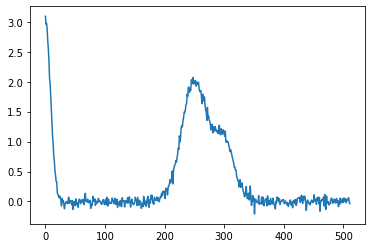

In [2]:
# Create profile with multiple, blended Gaussians and added noise
# Store in format required for GaussPy

import numpy as np
import pickle
import os
def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

# Specify filename of output data
FILENAME = 'multiple_gaussians.pickle'

# Number of Gaussian functions per spectrum
NCOMPS = 3

# Component properties
AMPS = [3,2,1]
FWHMS = [20,50,40] # channels
MEANS = [0,250,300] # channels

# Data properties
RMS = 0.05
NCHANNELS = 512


# Initialize
data = {}
chan = np.arange(NCHANNELS)
errors = np.ones(NCHANNELS) * RMS

spectrum = np.random.randn(NCHANNELS) * RMS

# Create spectrum
for a, w, m in zip(AMPS, FWHMS, MEANS):
    spectrum += gaussian(a, w, m)(chan)

# Enter results into AGD dataset
data['data_list'] = data.get('data_list', []) + [spectrum]
data['x_values'] = data.get('x_values', []) + [chan]
data['errors'] = data.get('errors', []) + [errors]
print(data['data_list'])
len(spectrum)
os.remove(FILENAME)
with open(FILENAME, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
import matplotlib.pyplot as plt
plt.plot(data['data_list'][0])

[6.6600e-03 1.0620e-02 1.8150e-02 3.4270e-02 8.7110e-02 5.9592e-01
 1.0000e-05 1.0000e-05 1.0000e-05 1.0000e-05]
1000
1000
1000
1000


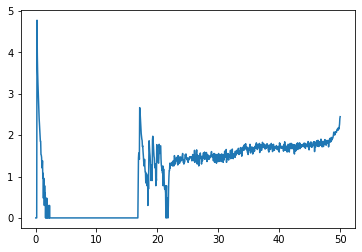

In [10]:
import pandas as pd
import os
import pickle
df = pd.read_csv('test.csv', sep=',')

#print(myFile)
df.T.values[1]
df.T.values[0]
data = {}
import numpy
#start = 570
#end = -1
import numpy

def shrink(data, rows):
    return data.reshape(rows, data.shape[0]//rows,).sum(axis=1)
newy=shrink(df.T.values[1],1000)
newx=df.T.values[0][range(0,len(df.T.values[0]),10)]
start = 0
newy=numpy.append(newy,[0,0,0,0])
end = len(newy)

print(newy[end-10:end]+[1e-5])
print(len(newx))
data['data_list'] = data.get('data_list', []) + [numpy.log10(newy[start+4:end]+1e-5)+5+1e-5]
#data['data_list'] = data.get('data_list', []) + [newy[start:end]+1e-5]
data['x_values'] = data.get('x_values', [])+ [50-newx[start:end]]
data['errors'] = data.get('errors', [])+[newy[start+4:end] * 0+1e-5]
print(len(data['data_list'][0]))
print(len(data['x_values'][0]))
print(len(data['errors'][0]))
FILENAME = 'multiple_gaussians.pickle'
os.remove(FILENAME)
with open(FILENAME, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
#pickle.dump(data, open(FILENAME, 'wb'))
import matplotlib.pyplot as plt
plt.plot(data['x_values'][0],data['data_list'][0])

[1.0900e-02 1.8330e-02 3.3620e-02 8.2480e-02 6.2022e-01 1.0000e-05
 1.0000e-05 1.0000e-05 1.0000e-05 1.0000e-05]
1000
1000
1000
1000


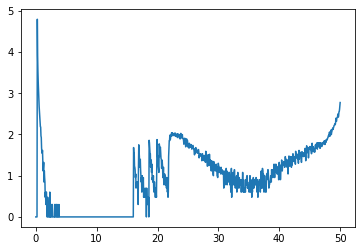

In [3]:
import pandas as pd
import os
import pickle
#df = pd.read_csv('bench90.csv', sep=',')
df = pd.read_csv('benchhigh.csv', sep=',')

#print(myFile)
df.values[1]
df.values[0]
data = {}
import numpy
#start = 570
#end = -1
import numpy

def shrink(data, rows):
    return data.reshape(rows, data.shape[0]//rows,).sum(axis=1)
newy=shrink(df.values[1],1000)
newx=df.values[0][range(0,len(df.values[0]),1)]
start = 0
newy=numpy.append(newy,[0,0,0,0])
end = len(newy)

print(newy[end-10:end]+[1e-5])
print(len(newx))
data['data_list'] = data.get('data_list', []) + [numpy.log10(newy[start+4:end]+1e-5)+5+1e-5]
#data['data_list'] = data.get('data_list', []) + [newy[start:end]+1e-5]
data['x_values'] = data.get('x_values', [])+ [50-newx[start:end]]
data['errors'] = data.get('errors', [])+[newy[start+4:end] * 0+2e-5]
print(len(data['data_list'][0]))
print(len(data['x_values'][0]))
print(len(data['errors'][0]))
FILENAME = 'multiple_gaussians.pickle'
os.remove(FILENAME)
with open(FILENAME, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
#pickle.dump(data, open(FILENAME, 'wb'))
import matplotlib.pyplot as plt
plt.plot(data['x_values'][0],data['data_list'][0])

[1.1270e-02 1.9470e-02 3.4080e-02 8.2040e-02 6.1948e-01 1.0000e-05
 1.0000e-05 1.0000e-05 1.0000e-05 1.0000e-05]
1000
1000
1000
1000


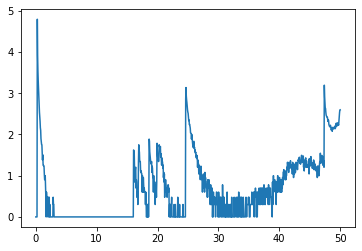

In [1]:
import pandas as pd
import os
import pickle
df = pd.read_csv('bench90.csv', sep=',')
#df = pd.read_csv('benchhigh.csv', sep=',')

#print(myFile)
df.values[1]
df.values[0]
data = {}
import numpy
#start = 570
#end = -1
import numpy

def shrink(data, rows):
    return data.reshape(rows, data.shape[0]//rows,).sum(axis=1)
newy=shrink(df.values[1],1000)
newx=df.values[0][range(0,len(df.values[0]),1)]
start = 0
newy=numpy.append(newy,[0,0,0,0])
end = len(newy)

print(newy[end-10:end]+[1e-5])
print(len(newx))
data['data_list'] = data.get('data_list', []) + [numpy.log10(newy[start+4:end]+1e-5)+5+1e-5]
#data['data_list'] = data.get('data_list', []) + [newy[start:end]+1e-5]
data['x_values'] = data.get('x_values', [])+ [50-newx[start:end]]
data['errors'] = data.get('errors', [])+[newy[start+4:end] * 0+2e-5]
print(len(data['data_list'][0]))
print(len(data['x_values'][0]))
print(len(data['errors'][0]))
FILENAME = 'multiple_gaussians.pickle'
os.remove(FILENAME)
with open(FILENAME, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
#pickle.dump(data, open(FILENAME, 'wb'))
import matplotlib.pyplot as plt
plt.plot(data['x_values'][0],data['data_list'][0])

array([ 0.        ,  0.05005005,  0.1001001 ,  0.15015015,  0.2002002 ,
        0.25025025,  0.3003003 ,  0.35035035,  0.4004004 ,  0.45045045,
        0.5005005 ,  0.55055055,  0.6006006 ,  0.65065065,  0.7007007 ,
        0.75075075,  0.8008008 ,  0.85085085,  0.9009009 ,  0.95095095,
        1.001001  ,  1.05105105,  1.1011011 ,  1.15115115,  1.2012012 ,
        1.25125125,  1.3013013 ,  1.35135135,  1.4014014 ,  1.45145145,
        1.5015015 ,  1.55155155,  1.6016016 ,  1.65165165,  1.7017017 ,
        1.75175175,  1.8018018 ,  1.85185185,  1.9019019 ,  1.95195195,
        2.002002  ,  2.05205205,  2.1021021 ,  2.15215215,  2.2022022 ,
        2.25225225,  2.3023023 ,  2.35235235,  2.4024024 ,  2.45245245,
        2.5025025 ,  2.55255255,  2.6026026 ,  2.65265265,  2.7027027 ,
        2.75275275,  2.8028028 ,  2.85285285,  2.9029029 ,  2.95295295,
        3.003003  ,  3.05305305,  3.1031031 ,  3.15315315,  3.2032032 ,
        3.25325325,  3.3033033 ,  3.35335335,  3.4034034 ,  3.45

In [2]:
# Decompose multiple Gaussian dataset using AGD
import pickle
import gausspy.gp as gp
import os
# Specify necessary parameters
alpha1 = 0.9
snr_thresh= 0.2
FILENAME_DATA = 'multiple_gaussians.pickle'
FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed.pickle'

# Load GaussPy
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'one')
g.set('SNR_thresh', [snr_thresh, snr_thresh])
g.set('alpha1', alpha1)
g.set('verbose',True)

# Run GaussPy
data_decomp = g.batch_decomposition(FILENAME_DATA)
os.remove(FILENAME_DATA_DECOMP)
# Save decomposition information
with open(FILENAME_DATA_DECOMP, 'wb') as handle:
    pickle.dump(data_decomp, handle, protocol=pickle.HIGHEST_PROTOCOL)
#pickle.dump(data_decomp, open(FILENAME_DATA_DECOMP, 'wb'))
data_decomp

using 3 out of 4 cpus
   ---->   0

  --> AGD() 



  --> initialGuess() 

Algorithm parameters: 
alpha = 0.9
SNR_thesh = 0.2
SNR2_thesh = 5.0
BLFrac = 0.1
Taking python derivatives...
...took 1.57 seconds per derivative.
Second derivative noise: 1.3576335846086907
Second derivative threshold: -6.788167923043453
-5.0
Components found for alpha=0.9: 13
here
[47.3973974  46.74674675 40.74074074 39.03903904 28.42842843 24.67467467
 21.77177177 19.91991992 18.61861862 16.91691692 16.06606607  2.85285285
  0.25025025]


  --> Final Fitting... 



/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:89: RuntimeWarning: overflow encountered in exp
  return lambda x: np.where((x) < (mean),0,peak * np.exp(- (x-mean) / np.exp(FWHM)))
/home/mirage_neos/.local/lib/python3.8/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/mirage_neos/.local/lib/python3.8/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
0.00it [00:00, ?it/s]
0it [00:00, ?it/s]

Final fit took 27.47286295890808 seconds.
N JOBSL
3
SUCCESS
100 finished.%


{'index_fit': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'amplitudes_fit': [[4.38131771725975,
   1.0804265908172808,
   3.053207895181139,
   1.6049852637089206,
   1.4942164462267828,
   1.3166430684517065,
   1.605023172536656,
   0.256913241440635,
   0.4348841525178251,
   0.5659799447633541,
   0.23045061605776626,
   0.48722813237120216,
   0.1292219757414873]],
 'fwhms_fit': [[-0.32251100648437,
   3.3743518404756,
   0.697052360852619,
   0.10175673640403077,
   0.3537061546580831,
   -0.226401067405399,
   -0.33049925193184754,
   -0.14547688905455605,
   9.272465500041731,
   9.410906149826113,
   9.9907614786919,
   -3.152413797899419,
   -1.9220798255916136]],
 'means_fit': [[0.23743084129929493,
   47.331941675229785,
   24.671522564924985,
   18.60371837187183,
   19.904527571137596,
   16.892404858458434,
   16.065035816823052,
   46.6559146602536,
   40.7398052864447,
   39.00400456460635,
   28.35058667304579,
   21.750217547792634,
   2.77942211343015]],
 'index_ini

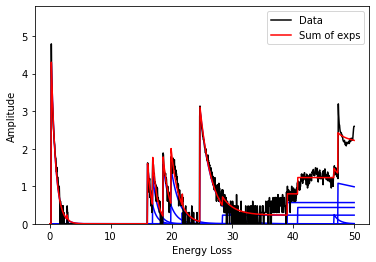

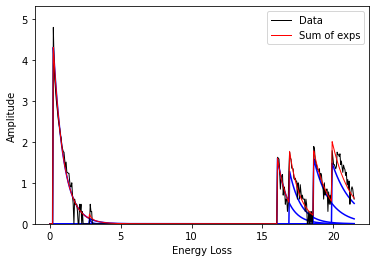

[3.53250959e+00 3.91403565e+00 4.79203729e+00 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
[0.35035035 0.3003003  0.25025025 0.2002002  0.15015015 0.1001001
 0.05005005 0.        ]


In [3]:
# Plot GaussPy results
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy
import math
from scipy.special import factorial
from gausspy.AGD_decomposer import gaussian
from gausspy.AGD_decomposer import gaussian2
#def gaussian(peak, FWHM, mean):
    #return lambda x: numpy.where((x) < (mean),0,peak * np.exp(- ((x)-mean) / (FWHM))) 
    #return lambda x: np.where((x) < (mean),0,peak + np.exp(1/(math.tan((x)-mean)) * (FWHM)))
# return lambda x: np.where((x) < (mean),0,peak/((x-mean)**(1/FWHM) ))

    #return lambda x: np.where((x)<mean, 0,peak / factorial((x-mean) / FWHM))
  
    #return lambda x: np.where((-(x-mean) / FWHM + (peak))<=0,0,np.where(((x) <= (mean)),0,-(x-mean) / FWHM + (peak))) 

def unravel(list):
    return np.array([i for array in list for i in array])
FILENAME_DATA = 'multiple_gaussians.pickle'
FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed.pickle'
with open(FILENAME_DATA,'rb') as file_object:
    data = pickle.load(file_object)
spectrum = data['data_list'][0]
chan = data['x_values'][0]
errors = data['errors'][0]
with open(FILENAME_DATA_DECOMP,'rb') as file_object:
    data_decomp = pickle.load(file_object)
#data_decomp = pickle.load(open(FILENAME_DATA_DECOMP))

means_fit = unravel(data_decomp['means_fit'])
amps_fit = unravel(data_decomp['amplitudes_fit'])
fwhms_fit = unravel(data_decomp['fwhms_fit'])

fig = plt.figure()
ax = fig.add_subplot(111)

model = np.zeros(len(chan))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan)
    model += component
    ax.plot(chan, component, color='blue', lw=1.5)
    #if means_fit[j] == max(means_fit):
    #    component = gaussian2(amps_fit[j], fwhms_fit[j], means_fit[j])(chan)
    #    model += component
    #    ax.plot(chan, component, color='purple', lw=1.5)
    #else:
    #    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan)
    #    model += component

ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, model, label = 'Sum of exps', color='red', linewidth=1.5)
#ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Energy Loss')
ax.set_ylabel('Amplitude')

#ax.set_xlim(0,len(chan))
ax.set_ylim(0,np.max(spectrum)+1)
ax.legend(loc=1)
chan
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
start=570
end=len(spectrum)
model = np.zeros(len(chan[start:end]))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan[start:end])
    model += component
    ax.plot(chan[start:end], component, color='blue', lw=1.5)

ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.)
ax.plot(chan[start:end], model, label = 'Sum of exps', color='red', linewidth=1.)
#ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Energy Loss')
ax.set_ylabel('Amplitude')

#ax.set_xlim(0,len(chan))
ax.set_ylim(0,np.max(model)+1)
ax.legend(loc=1)
chan
plt.show()
print(spectrum[-8:])
print(chan[-8:])

In [2]:
# Decompose multiple Gaussian dataset using AGD
import pickle
import gausspy.gp as gp
import os
# Specify necessary parameters
alpha1 = 0.000001
snr_thresh = 1.5
FILENAME_DATA = 'multiple_gaussians.pickle'
FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed.pickle'

# Load GaussPy
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'one')
g.set('SNR_thresh', [snr_thresh, snr_thresh])
g.set('alpha1', alpha1)1

# Run GaussPy
data_decomp = g.batch_decomposition(FILENAME_DATA)
os.remove(FILENAME_DATA_DECOMP)
# Save decomposition information
with open(FILENAME_DATA_DECOMP, 'wb') as handle:
    pickle.dump(data_decomp, handle, protocol=pickle.HIGHEST_PROTOCOL)
#pickle.dump(data_decomp, open(FILENAME_DATA_DECOMP, 'wb'))
data_decomp

SyntaxError: invalid syntax (<ipython-input-2-5db6cffce292>, line 17)

/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: inva

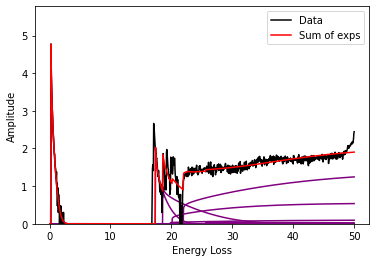

/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: inva

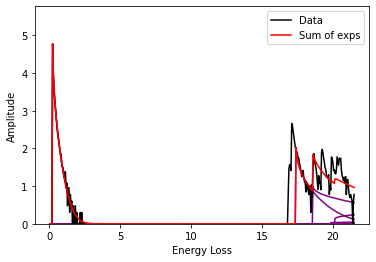

In [10]:
# Plot GaussPy results
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy
import math
from scipy.special import factorial
from gausspy.AGD_decomposer import gaussian
#def gaussian(peak, FWHM, mean):
    #return lambda x: numpy.where((x) < (mean),0,peak * np.exp(- ((x)-mean) / (FWHM))) 
    #return lambda x: np.where((x) < (mean),0,peak + np.exp(1/(math.tan((x)-mean)) * (FWHM)))
# return lambda x: np.where((x) < (mean),0,peak/((x-mean)**(1/FWHM) ))

    #return lambda x: np.where((x)<mean, 0,peak / factorial((x-mean) / FWHM))
  
    #return lambda x: np.where((-(x-mean) / FWHM + (peak))<=0,0,np.where(((x) <= (mean)),0,-(x-mean) / FWHM + (peak))) 

def unravel(list):
    return np.array([i for array in list for i in array])
FILENAME_DATA = 'multiple_gaussians.pickle'
FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed.pickle'
with open(FILENAME_DATA,'rb') as file_object:
    data = pickle.load(file_object)
spectrum = data['data_list'][0]
chan = data['x_values'][0]
errors = data['errors'][0]
with open(FILENAME_DATA_DECOMP,'rb') as file_object:
    data_decomp = pickle.load(file_object)
#data_decomp = pickle.load(open(FILENAME_DATA_DECOMP))
means_fit = unravel(data_decomp['means_fit'])
amps_fit = unravel(data_decomp['amplitudes_fit'])
fwhms_fit = unravel(data_decomp['fwhms_fit'])

fig = plt.figure()
ax = fig.add_subplot(111)

model = np.zeros(len(chan))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan)
    model += component
    ax.plot(chan, component, color='purple', lw=1.5)

ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, model, label = 'Sum of exps', color='red', linewidth=1.5)
#ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Energy Loss')
ax.set_ylabel('Amplitude')

#ax.set_xlim(0,len(chan))
ax.set_ylim(0,np.max(spectrum)+1)
ax.legend(loc=1)
chan
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
start=570
end=len(spectrum)
model = np.zeros(len(chan[start:end]))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan[start:end])
    model += component
    ax.plot(chan[start:end], component, color='purple', lw=1.5)

ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
ax.plot(chan[start:end], model, label = 'Sum of exps', color='red', linewidth=1.5)
#ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Energy Loss')
ax.set_ylabel('Amplitude')

#ax.set_xlim(0,len(chan))
ax.set_ylim(0,np.max(model)+1)
ax.legend(loc=1)
chan
plt.show()

In [14]:
# Decompose multiple Gaussian dataset using AGD
import pickle
import gausspy.gp as gp
import os
# Specify necessary parameters
alpha1 = 0.001
snr_thresh = 3
FILENAME_DATA = 'multiple_gaussians.pickle'
FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed.pickle'

# Load GaussPy
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'one')
g.set('SNR_thresh', [snr_thresh, snr_thresh])
g.set('alpha1', alpha1)

# Run GaussPy
data_decomp = g.batch_decomposition(FILENAME_DATA)
os.remove(FILENAME_DATA_DECOMP)
# Save decomposition information
with open(FILENAME_DATA_DECOMP, 'wb') as handle:
    pickle.dump(data_decomp, handle, protocol=pickle.HIGHEST_PROTOCOL)
#pickle.dump(data_decomp, open(FILENAME_DATA_DECOMP, 'wb'))
data_decomp

using 2 out of 4 cpus
   ---->   0


/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:268: RuntimeWarning: invalid value encountered in double_scalars
  FF_matrix[i, j] = np.where(offsets[i]<offsets[j],0,amps[j]*np.exp(-((offsets[i] - offsets[j])*np.exp(-(offsets[i] - offsets[j])))**(1/FWHMs[j])))


[4.83525e+01 4.67075e+01 4.56575e+01 4.50875e+01 4.44525e+01 4.42175e+01
 4.34075e+01 4.31375e+01 4.25025e+01 4.24375e+01 4.23275e+01 4.13925e+01
 4.07075e+01 3.99425e+01 3.98225e+01 3.95125e+01 3.91225e+01 3.68475e+01
 3.66475e+01 3.62925e+01 3.59375e+01 3.54825e+01 3.50225e+01 3.45625e+01
 3.33625e+01 3.32375e+01 3.30725e+01 3.30125e+01 3.29275e+01 3.26725e+01
 3.26025e+01 3.19875e+01 3.19175e+01 3.15925e+01 2.89375e+01 2.88675e+01
 2.80325e+01 2.70075e+01 2.67075e+01 2.66325e+01 2.63825e+01 2.58975e+01
 2.40675e+01 2.02975e+01 2.02375e+01 2.00725e+01 1.97025e+01 1.91775e+01
 1.90075e+01 1.84225e+01 1.72825e+01 1.68975e+01 1.67075e+01 6.42500e-01
 3.25000e-02]
[0.10940354 0.09931858 0.10411556 0.10991058 0.1056465  0.09210018
 0.11267341 0.09665355 0.10173683 0.09065046 0.10039773 0.09322775
 0.10630373 0.10740149 0.11206157 0.09519915 0.09409647 0.10468884
 0.08233806 0.08690993 0.1049406  0.08912035 0.09473616 0.09215859
 0.09184738 0.09057609 0.11089566 0.08745353 0.10237553 0.092

/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: overflow encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
0.00it [00:00, ?it/s]
0it [00:00, ?it/s]

N JOBSL
2
SUCCESS
100 finished.%


{'index_fit': [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0]],
 'amplitudes_fit': [[2.2274410531747497,
   0.7185072189626236,
   0.4243245383778449,
   0.3887235091108563,
   0.025291430093133282,
   0.05384865557959673,
   0.030851913063551395,
   0.03350533156497448,
   0.010207946782383459,
   0.01622248932392867,
   0.3367612809582421,
   0.2433301349560455,
   0.6217441835921644,
   0.10643552361874264,
   0.029558918342965423,
   0.009556428418157292,
   0.40879063478204647,
   0.025649588631383224,
   0.0308914620472438,
   0.013845341208778228,
   0.02343754296911804,
   0.030998248597357447,
   0.2452365448679592,
   0.2035932456753311,
   0.04604998182919062,
   0.22308645229065038,
   0.0014141199

/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: inva

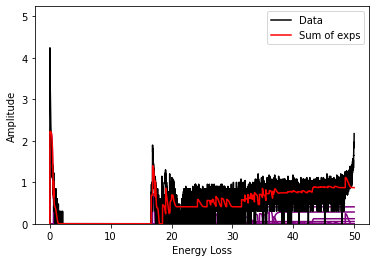

/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: invalid value encountered in power
  return lambda x: np.where((x) < (mean),1e-5,peak*np.exp(-((x-mean)*np.exp((x-mean)))**(1/FWHM)))
/home/mirage_neos/OneDrive/PhD/Packages/exdpy/gausspy/AGD_decomposer.py:77: RuntimeWarning: inva

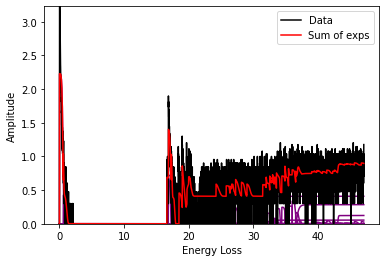

In [15]:
# Plot GaussPy results
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy
import math
from scipy.special import factorial
from gausspy.AGD_decomposer import gaussian
#def gaussian(peak, FWHM, mean):
    #return lambda x: numpy.where((x) < (mean),0,peak * np.exp(- ((x)-mean) / (FWHM))) 
    #return lambda x: np.where((x) < (mean),0,peak + np.exp(1/(math.tan((x)-mean)) * (FWHM)))
# return lambda x: np.where((x) < (mean),0,peak/((x-mean)**(1/FWHM) ))

    #return lambda x: np.where((x)<mean, 0,peak / factorial((x-mean) / FWHM))
  
    #return lambda x: np.where((-(x-mean) / FWHM + (peak))<=0,0,np.where(((x) <= (mean)),0,-(x-mean) / FWHM + (peak))) 

def unravel(list):
    return np.array([i for array in list for i in array])
FILENAME_DATA = 'multiple_gaussians.pickle'
FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed.pickle'
with open(FILENAME_DATA,'rb') as file_object:
    data = pickle.load(file_object)
spectrum = data['data_list'][0]
chan = data['x_values'][0]
errors = data['errors'][0]
with open(FILENAME_DATA_DECOMP,'rb') as file_object:
    data_decomp = pickle.load(file_object)
#data_decomp = pickle.load(open(FILENAME_DATA_DECOMP))
means_fit = unravel(data_decomp['means_fit'])
amps_fit = unravel(data_decomp['amplitudes_fit'])
fwhms_fit = unravel(data_decomp['fwhms_fit'])

fig = plt.figure()
ax = fig.add_subplot(111)

model = np.zeros(len(chan))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan)
    model += component
    ax.plot(chan, component, color='purple', lw=1.5)

ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, model, label = 'Sum of exps', color='red', linewidth=1.5)
#ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Energy Loss')
ax.set_ylabel('Amplitude')

#ax.set_xlim(0,len(chan))
ax.set_ylim(0,np.max(spectrum)+1)
ax.legend(loc=1)
chan
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
start=570
end=len(spectrum)
model = np.zeros(len(chan[start:end]))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan[start:end])
    model += component
    ax.plot(chan[start:end], component, color='purple', lw=1.5)

ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
ax.plot(chan[start:end], model, label = 'Sum of exps', color='red', linewidth=1.5)
#ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Energy Loss')
ax.set_ylabel('Amplitude')

#ax.set_xlim(0,len(chan))
ax.set_ylim(0,np.max(model)+1)
ax.legend(loc=1)
chan
plt.show()

0.04999999999999716
999
[0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (999,)

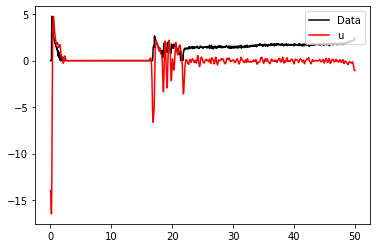

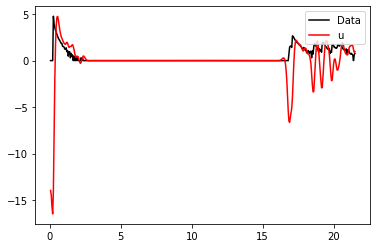

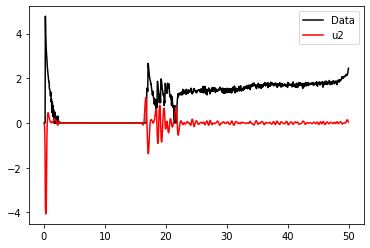

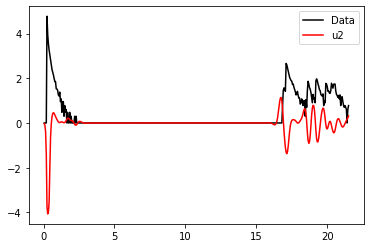

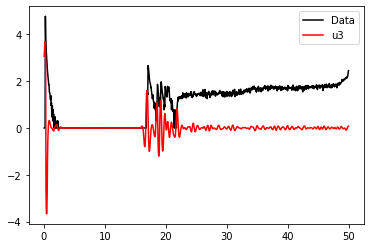

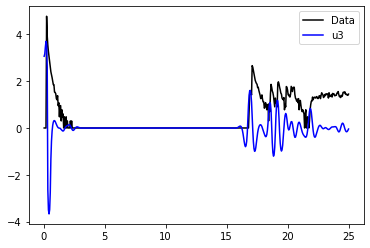

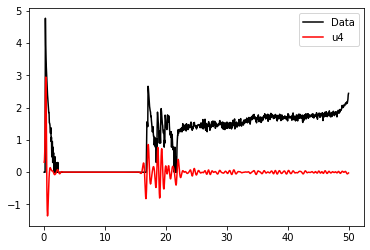

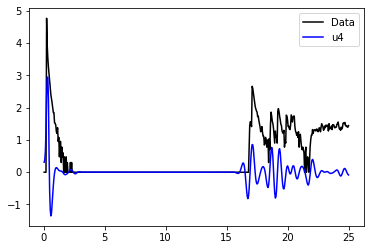

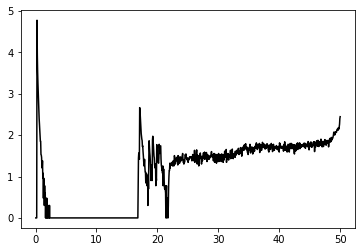

In [8]:
from gausspy import tvdiff
import matplotlib.pyplot as plt
import numpy as np
spectrum = data['data_list'][0]
chan = data['x_values'][0]
errors = data['errors'][0]
dv=np.abs(chan[1]-chan[0])
print(dv)
alpha = 1
u = tvdiff.TVdiff(spectrum,dx=dv,alph=alpha)
u2 = tvdiff.TVdiff(u,dx=dv,alph=alpha)
u3 = tvdiff.TVdiff(u2,dx=dv,alph=alpha)
u4 = tvdiff.TVdiff(u3,dx=dv,alph=alpha)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, u, label='u', color='red', linewidth=1.5)
ax.legend(loc=1)
start=570
end=len(chan)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
ax.plot(chan[start:end], u[start:end], label='u', color='red', linewidth=1.5)
ax.legend(loc=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, u2/20,label='u2', color='red', linewidth=1.5)
ax.legend(loc=1)
start=570
end=len(chan)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
ax.plot(chan[start:end], u2[start:end]/20, label='u2', color='red', linewidth=1.5)
ax.legend(loc=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, u3/100, label='u3', color='red', linewidth=1.5)
ax.legend(loc=1)
start=500
end=len(chan)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
#ax.plot(chan[start+1:end], u3[start+1:end], label='Data', color='red', linewidth=1.5)
ax.plot(chan[start:end], u3[start:end]/100, label='u3', color='blue', linewidth=1.5)
ax.legend(loc=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, u4/1000, label='u4', color='red', linewidth=1.5)
ax.legend(loc=1)
start=500
end=len(chan)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
#ax.plot(chan[start+1:end], u3[start+1:end], label='Data', color='red', linewidth=1.5)
ax.plot(chan[start:end], u4[start:end]/1000, label='u4', color='blue', linewidth=1.5)
ax.legend(loc=1)

fig = plt.figure()
ax = fig.add_subplot(111)
mask4 = np.array((u2.copy()[1:] < -2), dtype="int")  # Negative second derivative
mask1 = np.array((np.diff(np.sign(u3))>0), dtype="int")  # Negative second derivative
print(len(mask4))
print(mask4[start:end-1])
print(mask1)
print(mask4*mask1)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, mask4, label='Data', color='red', linewidth=1.5)
ax.legend(loc=1)
start=500
end=len(chan)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
#ax.plot(chan[start:end], mask4[start:end], label='Data', color='red', linewidth=1.5)
#ax.plot(chan[start+1:end], np.diff(np.sign(u3[start:end]))<0, label='Data', color='blue', linewidth=1.5)
ax.plot(chan[start+1:end], mask4[start+1:end]+(np.diff(np.sign(u3[start:end]))>0), label='Data', color='green', linewidth=1.5)
ax.legend(loc=1)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(chan[start:end], spectrum[start:end], label='Data', color='black', linewidth=1.5)
ax.plot(chan[start+1:end], mask4[start+1:end], label='Data', color='red', linewidth=1.5)
ax.plot(chan[start+1:end], np.diff(np.sign(u4[start:end]))<0, label='Data', color='blue', linewidth=1.5)
#ax.plot(chan[start+1:end], mask4[start+1:end]*(np.diff(np.sign(u3[start:end]))<0), label='Data', color='green', linewidth=1.5)
ax.legend(loc=1)


start=500
end=len(chan)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan[start:end], spectrum[start:end], label='Data', color='pink', linewidth=1.5)
ax.plot(chan[start:end], u[start:end]/5, label='u', color='red', linewidth=1.)
ax.plot(chan[start:end], u2[start:end]/20, label='u2', color='green', linewidth=1.)
ax.plot(chan[start:end], u3[start:end]/100, label='u3', color='blue', linewidth=1.)
ax.plot(chan[start:end], u4[start:end]/1000, label='u4', color='black', linewidth=1.)
ax.legend(loc=1)

array([1147341.25947565])

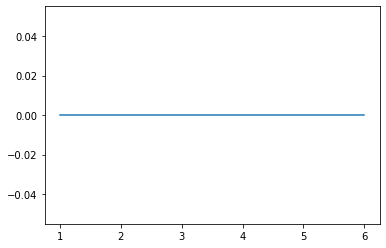

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy
import math
from scipy.special import factorial
def gaussian(peak, FWHM, mean):
    """Return a Gaussian function
    """
    #return lambda x: -peak * (x-mean-1)**21
    #return lambda x: -peak* ((x/FWHM) -mean-1)**21
    return lambda x: np.where((-peak*(x/FWHM-mean-1)**21)<=0,0,np.where(((x) < (mean)),0,-peak*(x/FWHM-mean-1)**21)) 

xnums = np.linspace(1,6,1000)
ynums= gaussian(3,0.5,5)(xnums)
plt.plot(xnums,ynums)
max(ynums)
#print(5*1)
gaussian(5,5,1)(np.array([1]))